<a href="https://colab.research.google.com/github/Nooreyni/Object_recognition/blob/main/full_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#!wget -N https://www.kaggle.com/moltean/fruits?select=fruits-360 -P data/

#!pip install -q kaggle

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
from google.colab import files

#files.upload()

In [72]:
#!mkdir ~/.kaggle

In [73]:
!cp kaggle.json ~/.kaggle/

In [74]:
!chmod 600 ~/.kaggle/kaggle.json

In [75]:
#!pip install --upgrade --force-reinstall --no-deps kaggle

In [76]:
#!kaggle competitions download -c Fruits 360
#!kaggle datasets download -d moltean/fruits
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
#from google.colab import drive
#drive.mount('/content/data')

In [78]:
#!ls "/content/data/MyDrive"

In [79]:
#!unzip -q "/content/fruits"
!unzip -u "/content/fruits" -d "/content/"

Archive:  /content/fruits.zip


In [80]:
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

(100, 100, 3)


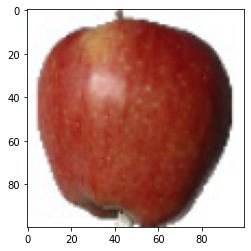

In [81]:
img = mpimg.imread('/content/fruits-360/Training/Apple Red 1/101_100.jpg')
print(img.shape)
plt.imshow(img)

(100, 100, 3)


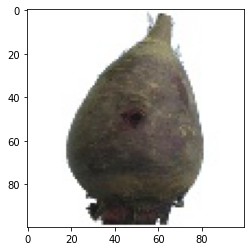

In [82]:
img = mpimg.imread('/content/fruits-360/Training/Beetroot/101_100.jpg')
print(img.shape)
plt.imshow(img)

In [83]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("/content/fruits-360/Training/"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("/content/fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("/content/fruits-360/Test/"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("/content/fruits-360/Test/"+ i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 67692
Count of Fruits in Set set: 22688


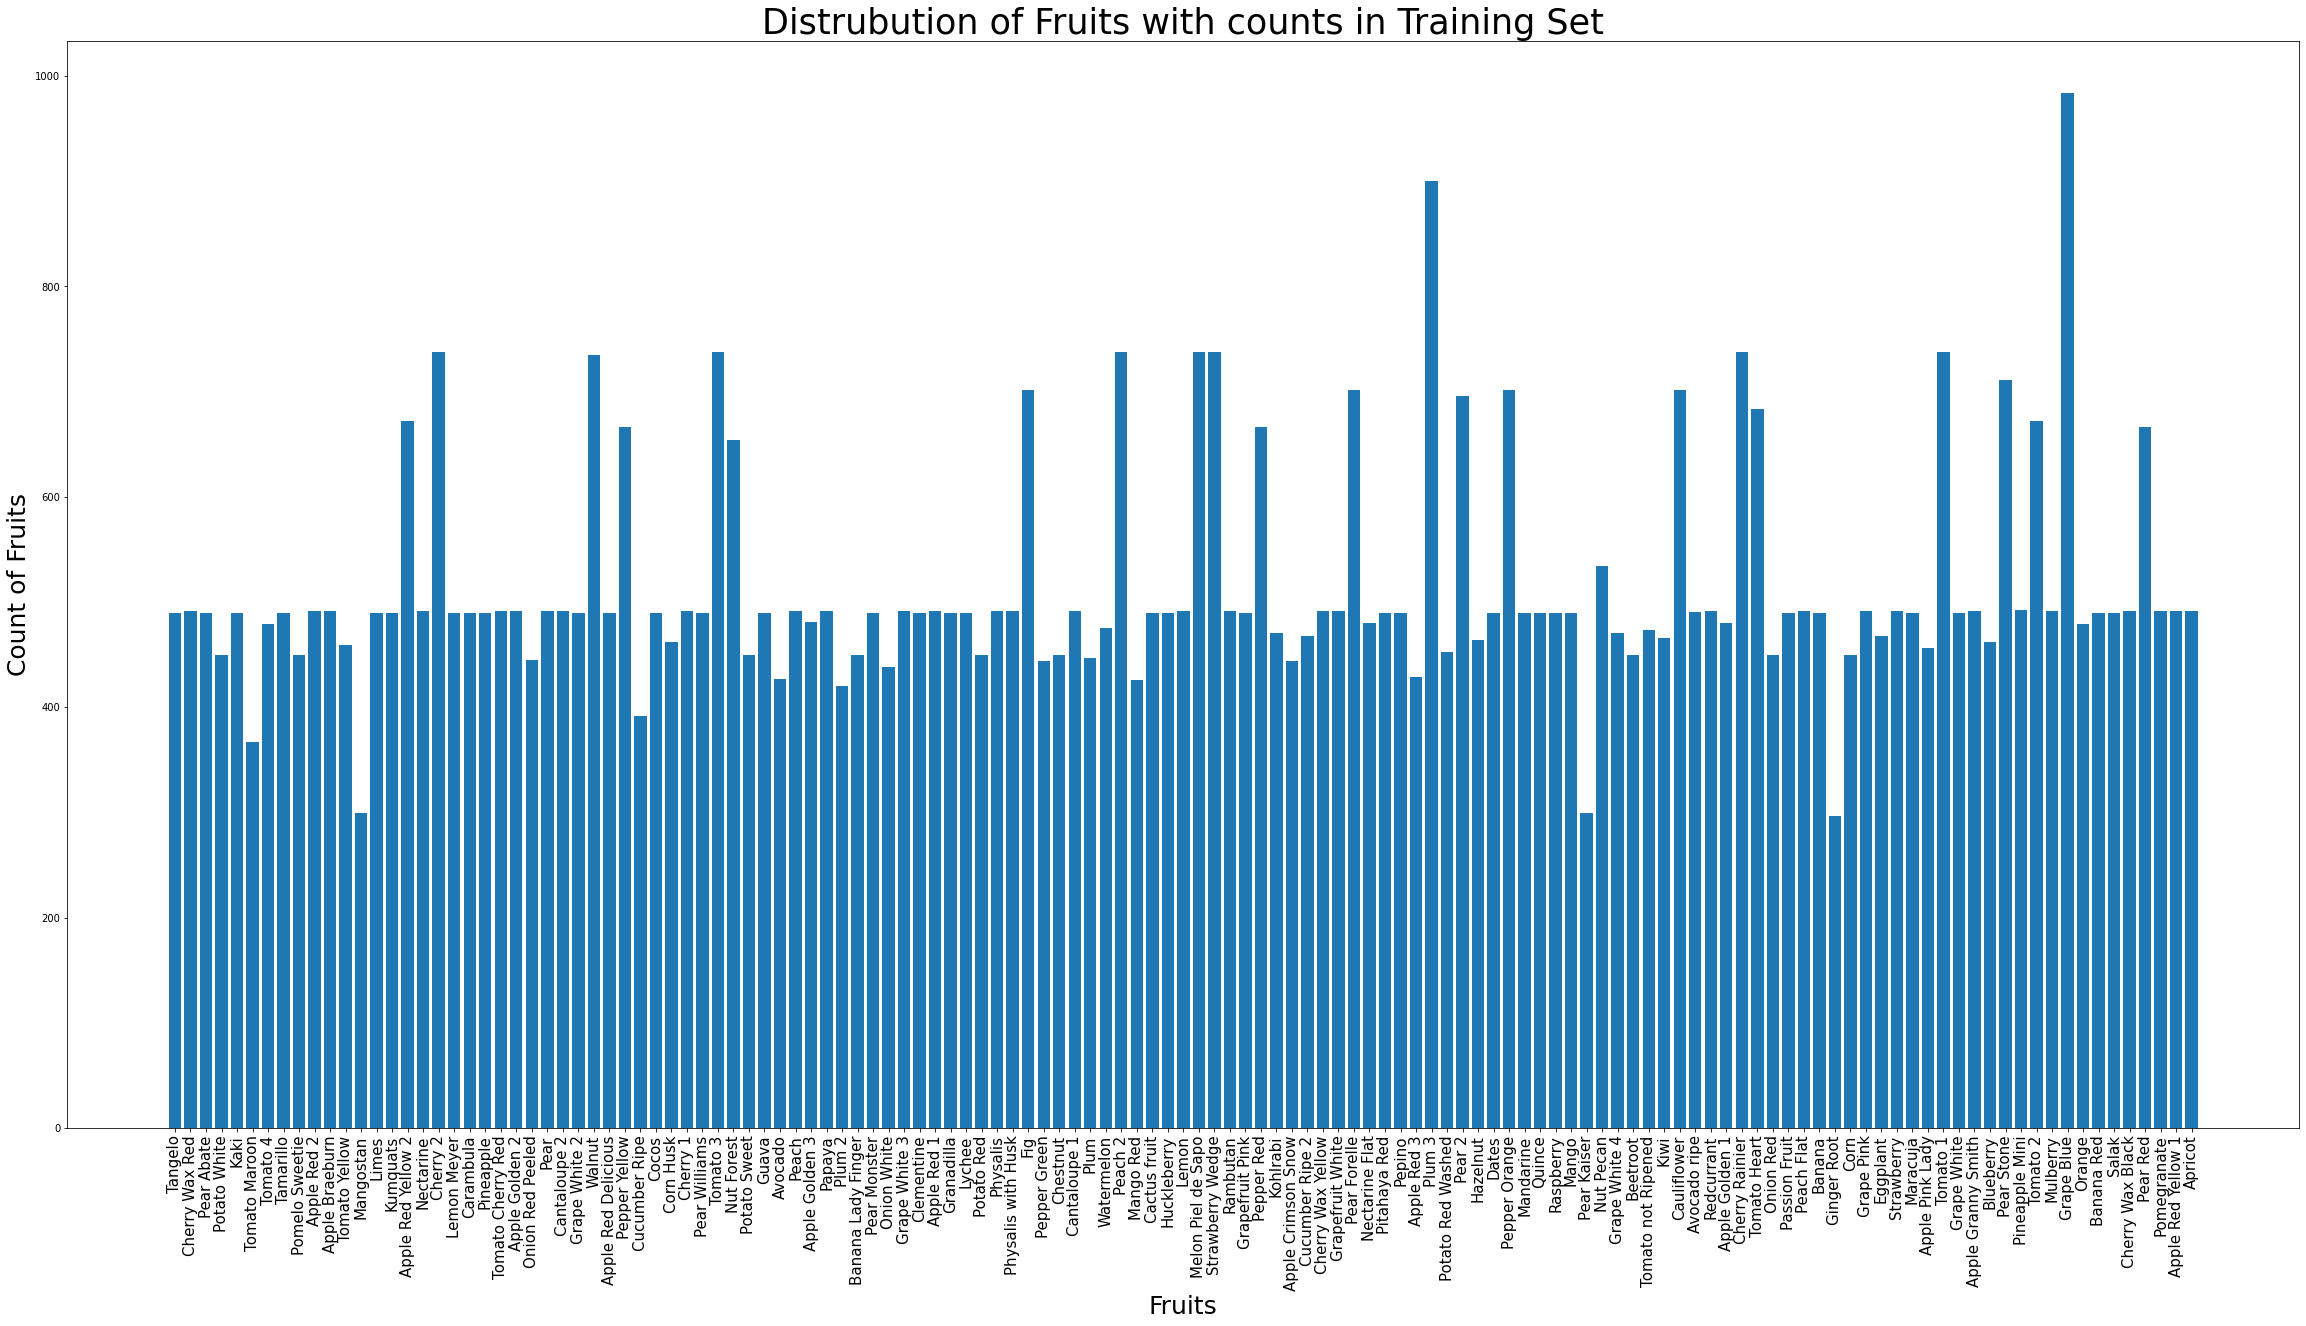

In [84]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

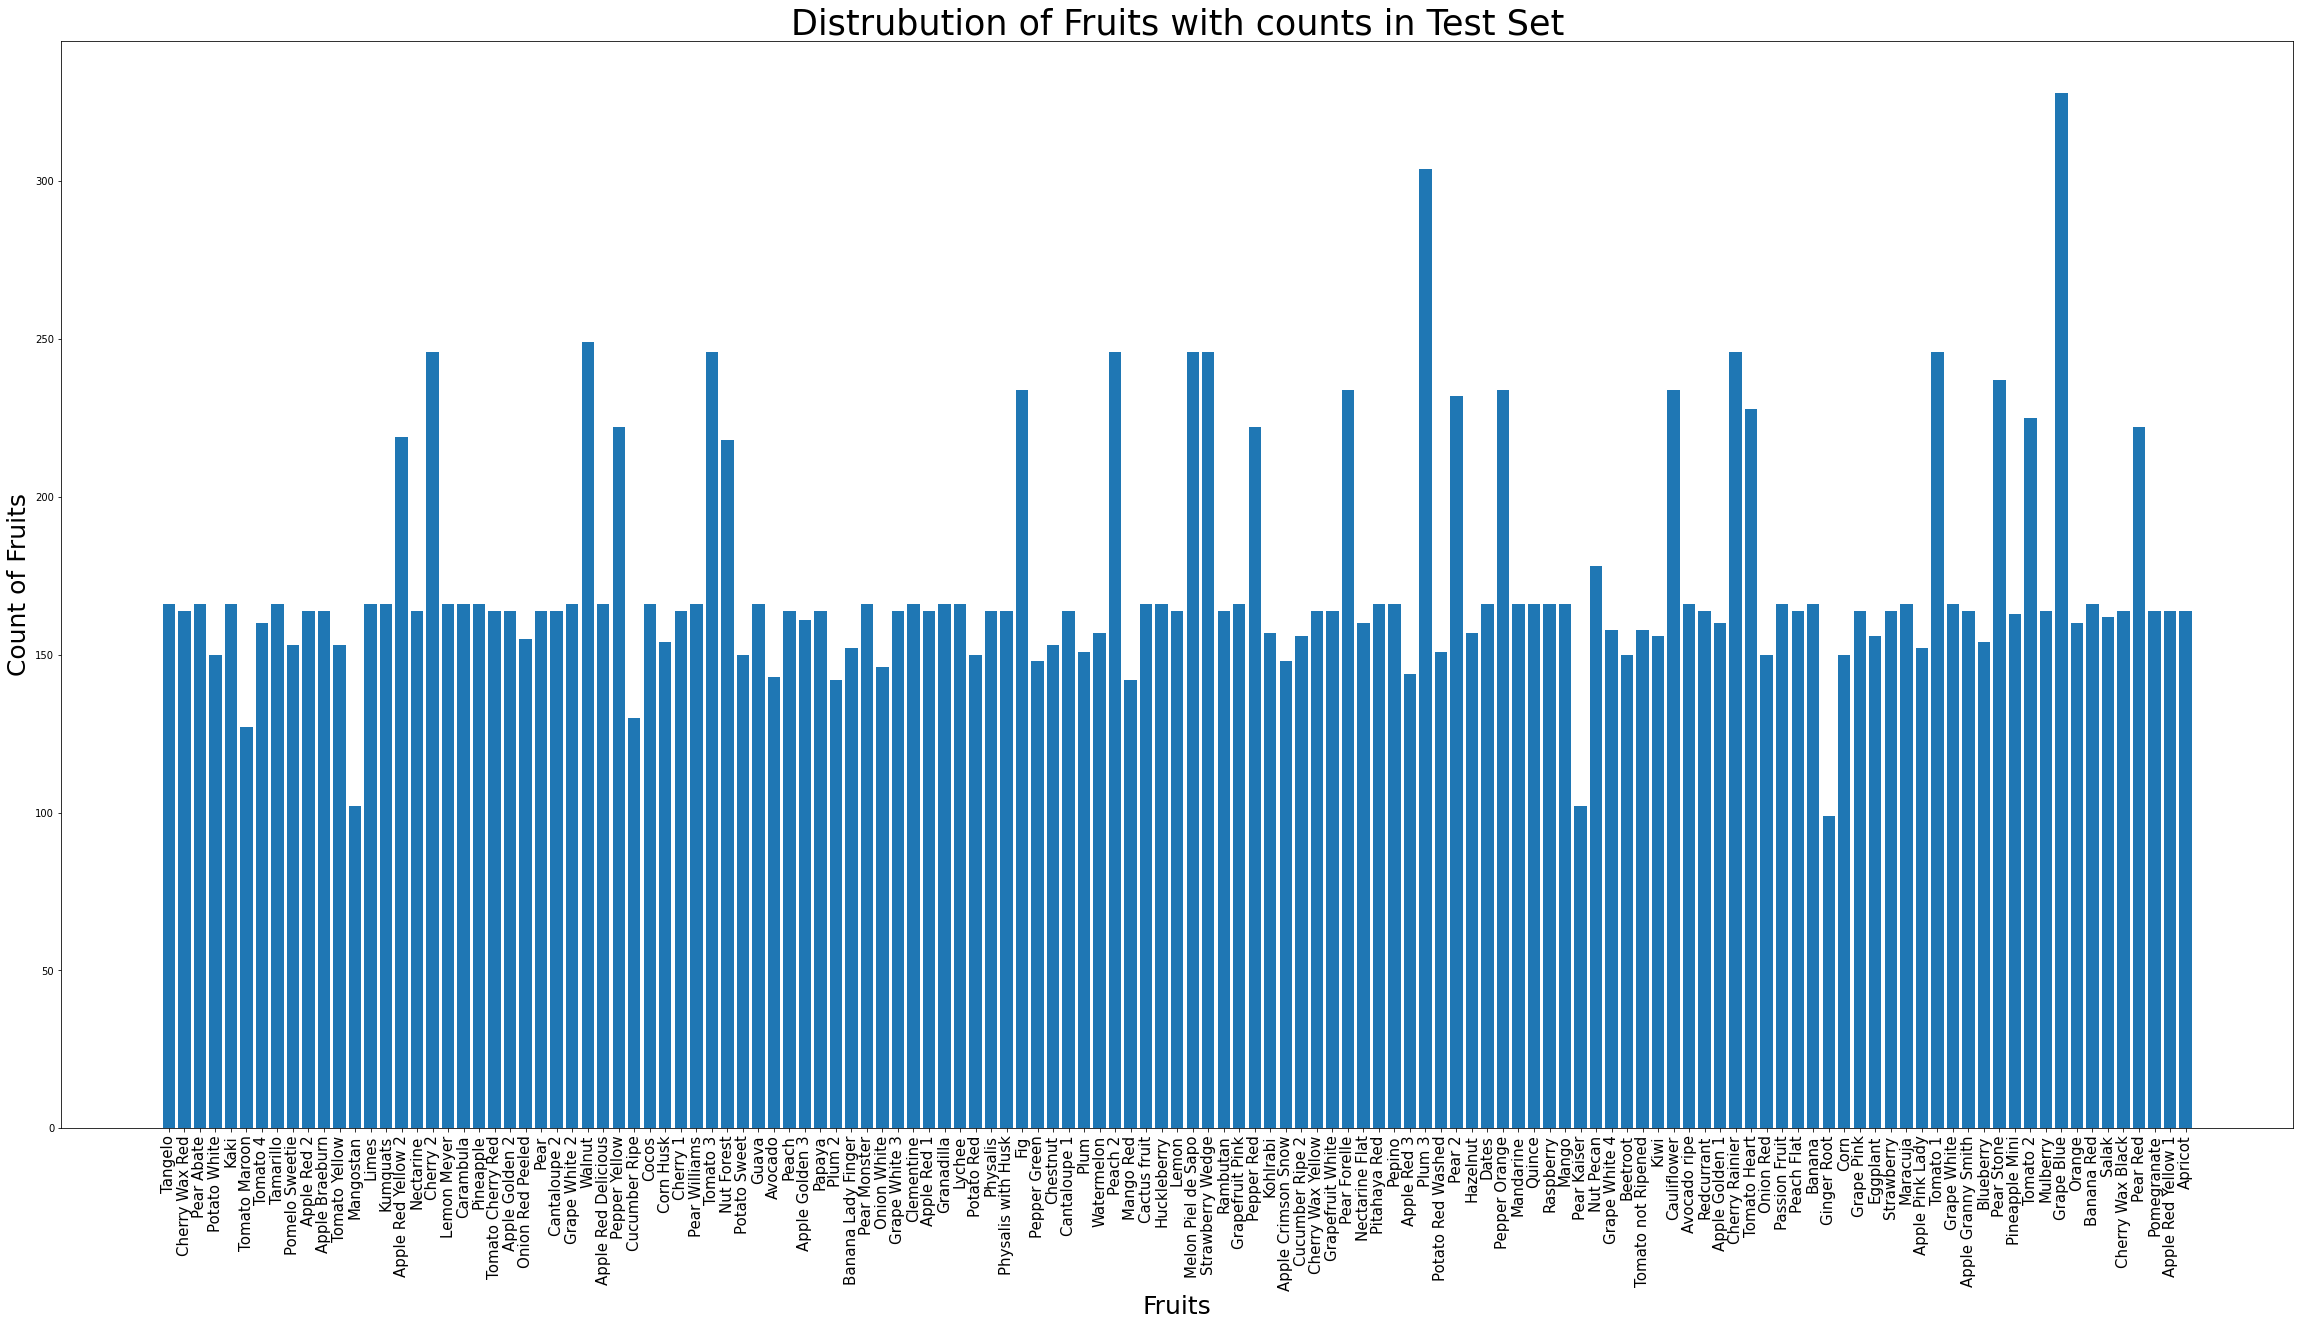

In [85]:
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(test_categories))
plt.bar(index, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()

In [86]:
from sklearn.datasets import load_files
train_dir = '/content/fruits-360/Training/'
test_dir = '/content/fruits-360/Test/'

def load_dataset(data_path):
    data_loading = load_files(data_path)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add,targets_fruits,target_labels_fruits
    
X_train, y_train,target_labels = load_dataset(train_dir)
X_test, y_test,_ = load_dataset(test_dir)

In [87]:
X_train

array(['/content/fruits-360/Training/Cherry 2/r_263_100.jpg',
       '/content/fruits-360/Training/Nut Pecan/73_100.jpg',
       '/content/fruits-360/Training/Melon Piel de Sapo/r_45_100.jpg',
       ..., '/content/fruits-360/Training/Pear Stone/r2_206_100.jpg',
       '/content/fruits-360/Training/Pear 2/r2_292_100.jpg',
       '/content/fruits-360/Training/Pear Forelle/288_100.jpg'],
      dtype='<U62')

In [88]:
y_train

array([27, 73, 68, ..., 90, 84, 86])

In [89]:
# number of labels
nlabels = len(np.unique(y_train))
nlabels

131

In [90]:
y_train

array([27, 73, 68, ..., 90, 84, 86])

In [91]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,nlabels)
y_test = np_utils.to_categorical(y_test,nlabels)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [92]:
X_test.shape

(22688,)

In [93]:
y_test.shape

(22688, 131)

In [94]:
x_test,x_valid = X_test[:15000],X_test[15000:]
y_test,y_vaild = y_test[:15000],y_test[15000:]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7688,)
Vaildation y : (7688, 131)
Test X :  (15000,)
Test y :  (15000, 131)


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(X_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)